# **House Price Prediction (Regression)**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

### **Loading Dataset From URL***

In [ ]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
print(f"Dataset loaded. Shape: {df.shape}")
print(df.head())

Dataset loaded. Shape: (20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### **INFO**

In [ ]:
print("\nDataset info: \n")
print(df.info())


Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


### **Target Variable Stats**

In [ ]:
print("Target variable stats:\n")
print(df['median_house_value'].describe())

Target variable stats:

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


### **Missing Values**

In [ ]:
print("Missing values:\n")
print(df.isnull().sum())

df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

Missing values:

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### **One-Hot Encoding**

In [ ]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

### **Features and label**

In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

### **Split Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (16512, 12), Test set size: (4128, 12)


## **LINEAR REGRESSION**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"Linear Regression MAE: {mae_lin:.2f}, RMSE: {rmse_lin:.2f}")

Linear Regression MAE: 50670.74, RMSE: 70060.52


## **Gradient Boosting Regressor**

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print(f"Gradient Boosting MAE: {mae_gbr:.2f}, RMSE: {rmse_gbr:.2f}")

Gradient Boosting MAE: 38248.03, RMSE: 55884.66


### **Actual vs Predicted**

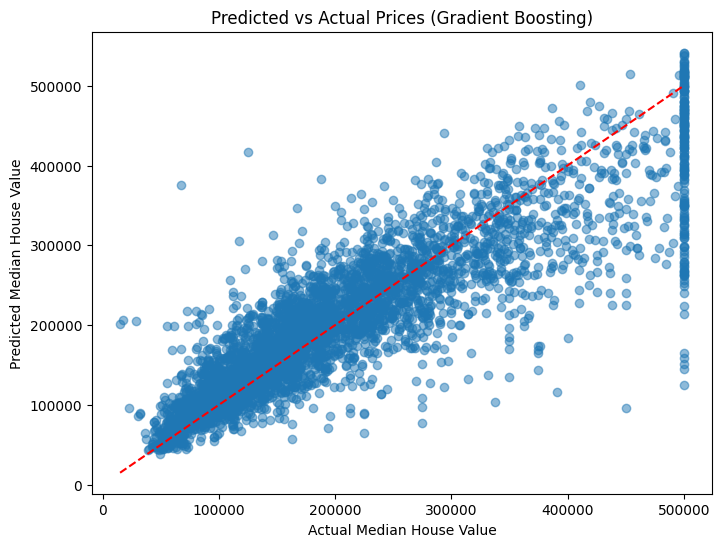

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs Actual Prices (Gradient Boosting)')
plt.show()

### **Training**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import gradio as gr

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
house_model = GradientBoostingRegressor(random_state=42)
house_model.fit(X_train, y_train)

# Prediction function
def predict_house(median_income, housing_median_age, total_rooms, total_bedrooms,
                  population, households, latitude, longitude,
                  ocean_NEAR_BAY=0, ocean_NEAR_OCEAN=0, ocean_INLAND=0, ocean_ISLAND=0):
    # The encoded columns need to match training
    input_data = pd.DataFrame([[median_income, housing_median_age, total_rooms,
                                total_bedrooms, population, households, latitude, longitude,
                                ocean_NEAR_BAY, ocean_NEAR_OCEAN, ocean_INLAND, ocean_ISLAND]],
                              columns=X.columns)
    prediction = house_model.predict(input_data)[0]
    return f"Predicted Median House Value: \n     '${prediction:,.2f}' "

## **Gradio Deplyement**

In [ ]:
house_iface = gr.Interface(
    fn=predict_house,
    inputs=[
        gr.Number(label="Median Income"),
        gr.Number(label="Housing Median Age"),
        gr.Number(label="Total Rooms"),
        gr.Number(label="Total Bedrooms"),
        gr.Number(label="Population"),
        gr.Number(label="Households"),
        gr.Number(label="Latitude"),
        gr.Number(label="Longitude"),
        gr.Number(label="NEAR_BAY (1=Yes, 0=No)"),
        gr.Number(label="NEAR_OCEAN (1=Yes, 0=No)"),
        gr.Number(label="INLAND (1=Yes, 0=No)"),
        gr.Number(label="ISLAND (1=Yes, 0=No)")
    ],
    outputs="text",
    title="House Price Predictor",
    description="Enter housing features to predict median house value."
)

house_iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://554f5cad1e70907888.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
